# Import Libraries

In [1]:
import pickle
import numpy as np
import os
import sys
sys.path.insert(0, os.getcwd()[:-6])
from v2i.src.core.common import loadPKL, savePKL, readYaml, reverseDict
import matplotlib.pyplot as plt
import math

# Experiment Related Details

1. Experiment ID - /home/mayank/ray_results/WithFullComm/PPO_v2i-v0_0_2019-08-24_14-32-0332s3e3o7
2. Data File - /home/mayank/ray_results/WithFullComm/PPO_v2i-v0_0_2019-08-24_14-32-0332s3e3o7/tfEnabledDataCheck2000/bumdist_tf_enabled.pkl
3. AlgoConfig - /home/mayank/Documents/upgraded-octo-lamp/experiments/WithFullComm/configFiles/ppo-algo-config.yml


In [2]:
datFile = "/home/mayank/ray_results/RestrictedComm/PPO_v2i-v0_0_2019-09-05_13-52-55gruikzwp/tfDataEnabledCheck1800/data_tf_enabled.pkl"

# Load Data file

In [3]:
simData = loadPKL(datFile)

### Utility Functions

In [4]:
actMap = {}
actMap[0] = 'acc'
actMap[1] = 'dec'
actMap[2] = 'lane-change'
actMap[3] = 'do-nothing'
reverseActMap = reverseDict(actMap)

In [5]:
def umax(distances, decRate):
    speeds = []
    for dist in distances:
        speeds.append(math.sqrt(2 * decRate * dist))
    return speeds

In [6]:
def decodeActions(actions):
    acts = []
    for act in actions:
        #print(act)
        acts.append(reverseActMap[act[0]])
    return acts

# Start Analysis

### Set the density to analyze

In [7]:
density = 0.3

In [8]:
simData.keys()

dict_keys(['maxSpeed', 'maxViewSpeed', 'plan-acts', 'query-acts', 'max-episode-length', 'data'])

In [9]:
simData['max-episode-length']

1200

In [10]:
simData['data'].keys()

dict_keys([0.1, 0.3, 0.5, 0.7, 0.9])

In [11]:
simData['data'][density].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

In [12]:
simData['data'][density][0].keys()

dict_keys(['speed', 'rewards', 'actions', 'bum2bumdist', 'EgoMaxSpeed'])

In [13]:
egoSpeedofprematureEpisodes = []
bum2bumdistofprematureEpisodes = []
prematureEpisodeNumbers = []
actionsOfPrematureEpisodes = []

collisionCount = 0

for episode in simData['data'][density]:
    if len(simData['data'][density][episode]['speed']) < simData['max-episode-length']:
        egoSpeedofprematureEpisodes.append(simData['data'][density][episode]['speed'])
        bum2bumdistofprematureEpisodes.append(simData['data'][density][episode]['bum2bumdist'][-1])
        prematureEpisodeNumbers.append(episode)
        actionsOfPrematureEpisodes.append(simData['data'][density][episode]['actions'][-1])
        collisionCount += 1

# Metrics

In [14]:
print("Number of Episodes tested : ", len(simData['data'][density]))
print("Number of Episodes ended with collision ", collisionCount/len(simData['data'][density]) * 100, "%")

Number of Episodes tested :  80
Number of Episodes ended with collision  73.75 %


### Plot for ego vehicle speed for last $t$ time steps before collision

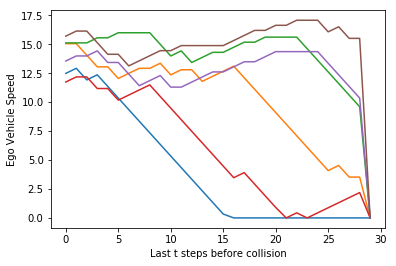

In [15]:
numLastSteps = 30
numEpisodes = 5

for idx, plot in enumerate(egoSpeedofprematureEpisodes):
    newList = plot[-numLastSteps:]
    newList = [x * 2 for x in newList]
    plt.plot(np.arange(numLastSteps), newList)
    
    if idx == numEpisodes:
        break
plt.xlabel("Last t steps before collision")
plt.ylabel("Ego Vehicle Speed")
plt.show()

In [16]:
actionsOfPrematureEpisodes

[('lane-change', 'reg_3'),
 ('acc', 'reg_3'),
 ('dec', 'reg_3'),
 ('acc', 'reg_2'),
 ('dec', 'reg_3'),
 ('lane-change', 'reg_0'),
 ('lane-change', 'reg_1'),
 ('do-nothing', 'reg_3'),
 ('do-nothing', 'reg_2'),
 ('lane-change', 'reg_3'),
 ('acc', 'reg_2'),
 ('lane-change', 'null'),
 ('acc', 'reg_3'),
 ('do-nothing', 'reg_2'),
 ('dec', 'reg_3'),
 ('lane-change', 'reg_3'),
 ('do-nothing', 'reg_3'),
 ('dec', 'null'),
 ('dec', 'reg_3'),
 ('dec', 'reg_2'),
 ('acc', 'reg_3'),
 ('dec', 'reg_2'),
 ('do-nothing', 'reg_2'),
 ('dec', 'reg_3'),
 ('lane-change', 'reg_3'),
 ('lane-change', 'reg_3'),
 ('dec', 'reg_1'),
 ('dec', 'reg_3'),
 ('lane-change', 'reg_0'),
 ('lane-change', 'reg_3'),
 ('acc', 'reg_1'),
 ('acc', 'reg_2'),
 ('do-nothing', 'reg_2'),
 ('lane-change', 'reg_3'),
 ('acc', 'reg_1'),
 ('lane-change', 'reg_2'),
 ('acc', 'reg_2'),
 ('acc', 'reg_2'),
 ('dec', 'reg_3'),
 ('acc', 'reg_2'),
 ('acc', 'reg_1'),
 ('dec', 'reg_3'),
 ('acc', 'reg_1'),
 ('acc', 'reg_2'),
 ('dec', 'reg_1'),
 ('lane-c

In [17]:
bum2bumdistofprematureEpisodes

[0.28978650650247584,
 0.3927009291566135,
 0.6331693391201512,
 0.009637775074152088,
 1.3515309993052016,
 10.294553753377103,
 2.874577835817437,
 0.33833440627064526,
 0.9063463852298703,
 3.0799021072432042,
 0.26240423444039607,
 8.944196006629028,
 0.08017188975064826,
 1.7053853681986872,
 1.18920290960107,
 3.563711209312724,
 0.03339882304022268,
 1.4104024105049868,
 0.14810002309703751,
 0.758559370471219,
 0.7221487997940423,
 0.5095074725557422,
 1.4866049106158137,
 0.13571741096492218,
 6.594226635257888,
 1.221863445446787,
 0.823782932844006,
 0.1952408910055592,
 7.6310716952056605,
 5.407393158862849,
 0.24571020466561588,
 0.06530078666198058,
 1.753415849293475,
 3.3028493190230153,
 0.05451292423999554,
 3.805476006963098,
 0.195695816307631,
 0.08960423444037602,
 1.146385644733857,
 0.1144539083805638,
 0.15946599384438276,
 0.2011621970000652,
 0.1629525768598281,
 0.129475238631362,
 0.6187175166078172,
 1.9521411287070327,
 1.2000448952176166,
 0.04190591632

### Plot bumper to bumper distance vs ego Vehicle Speed

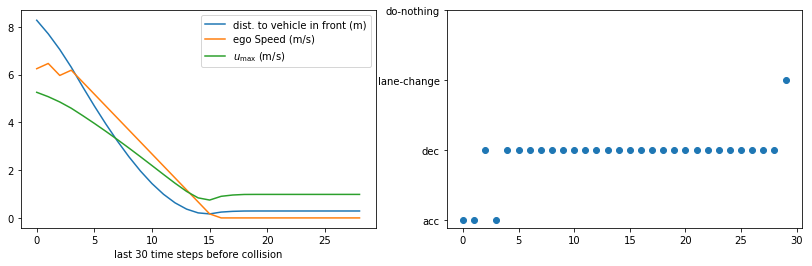

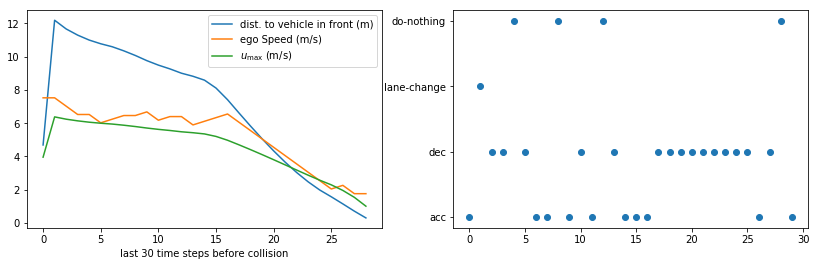

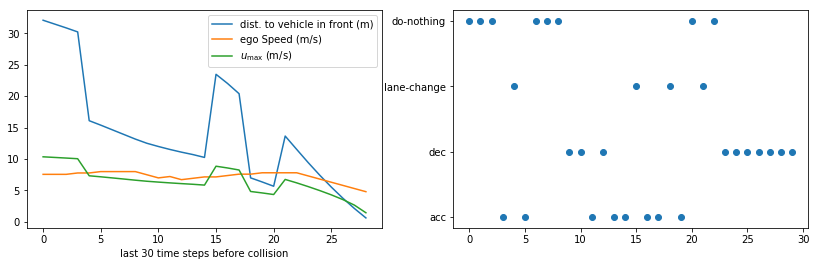

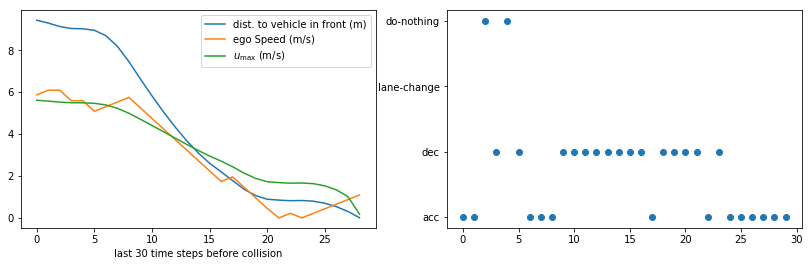

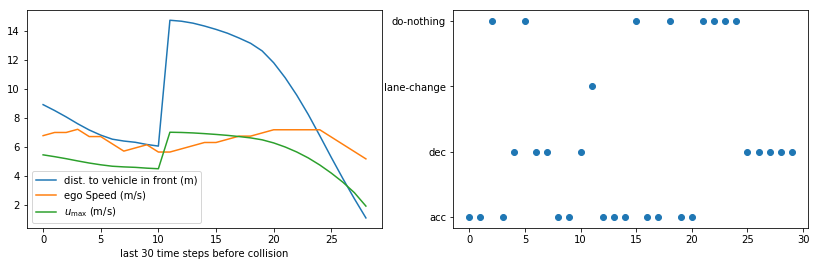

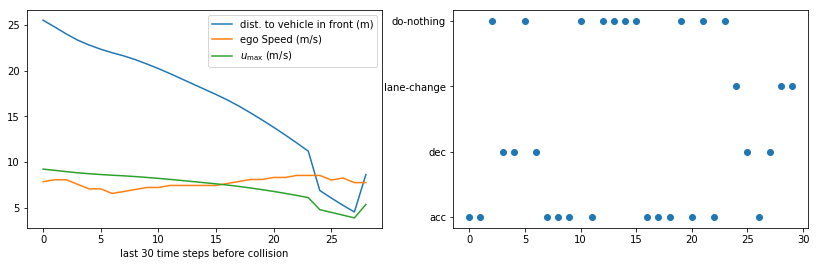

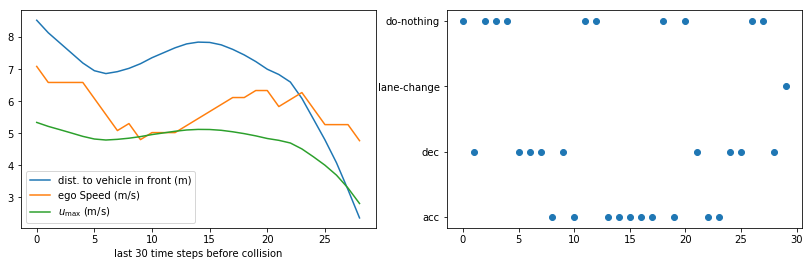

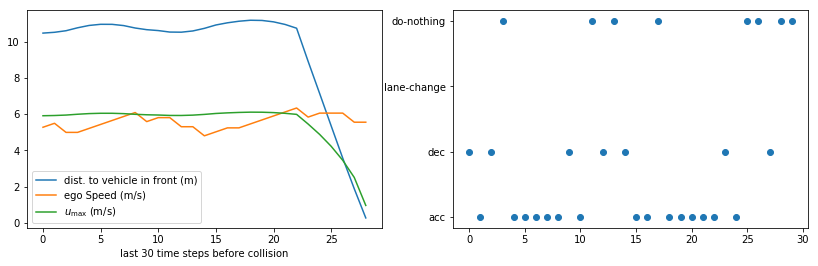

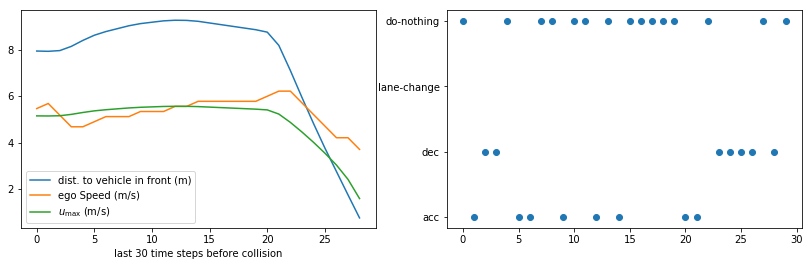

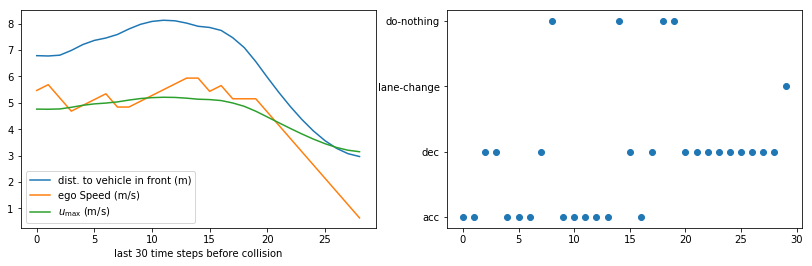

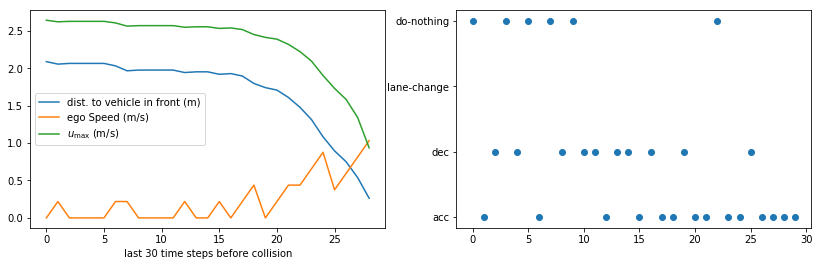

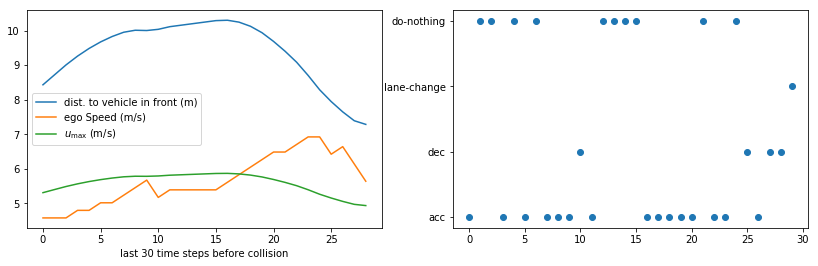

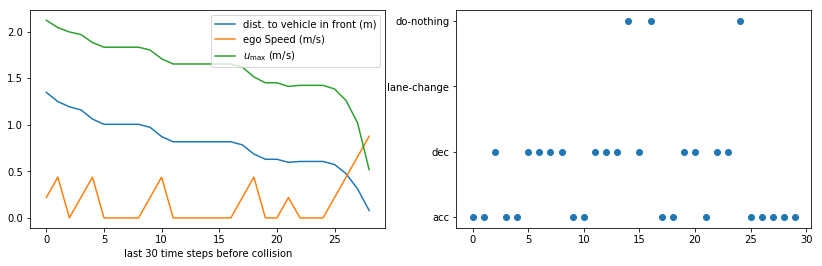

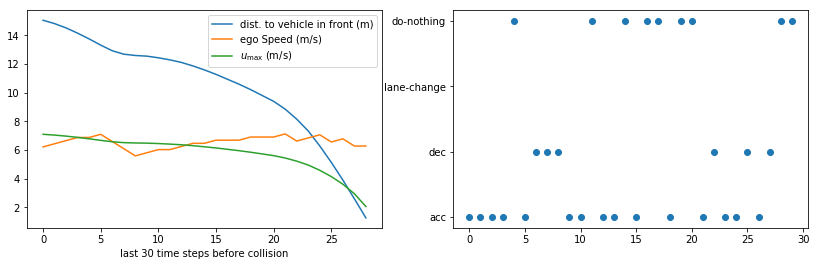

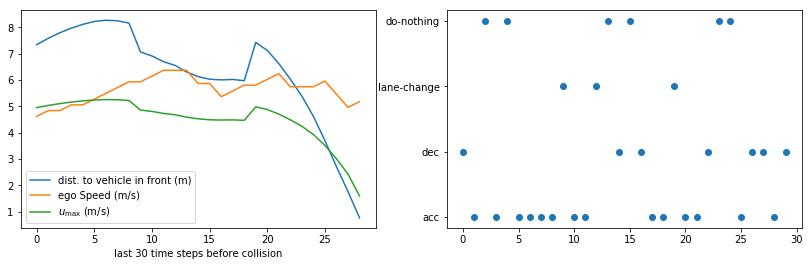

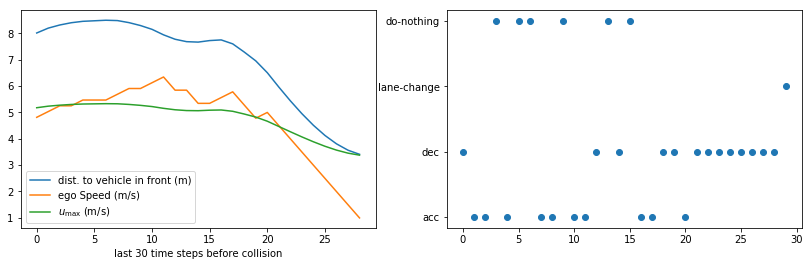

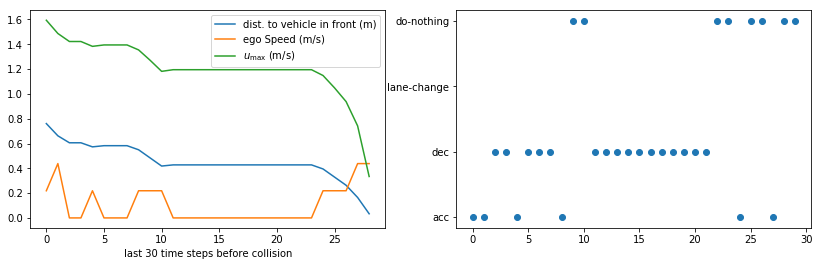

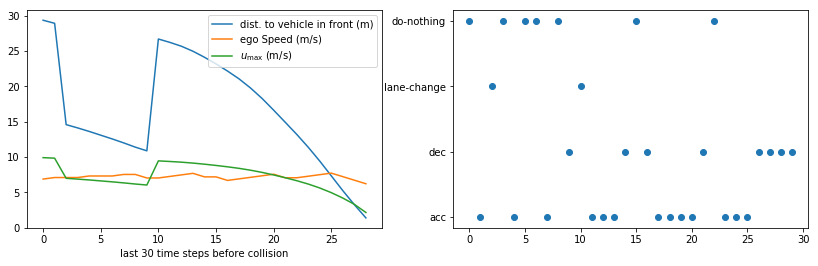

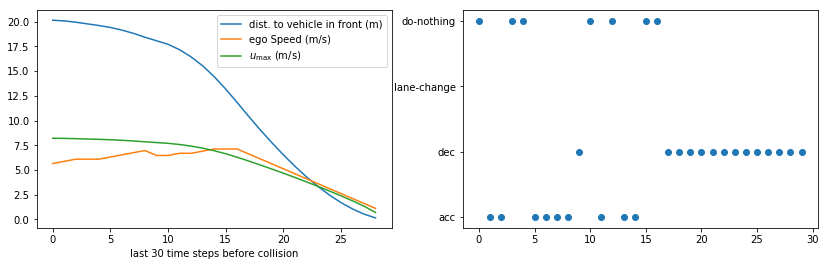

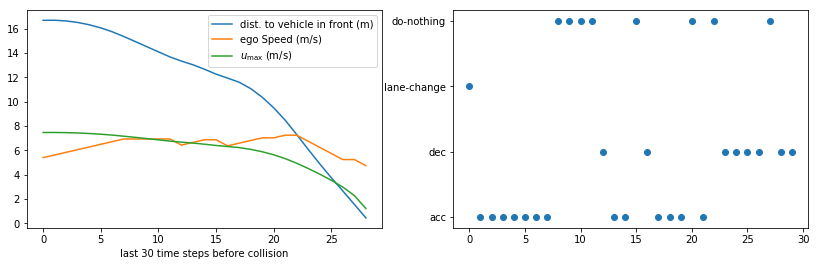

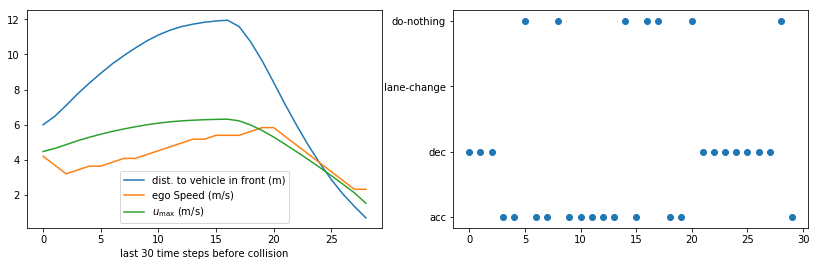

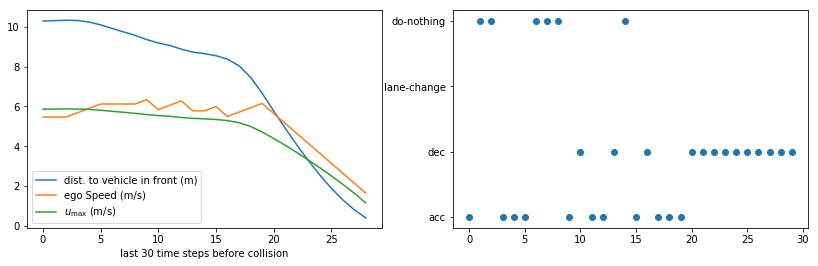

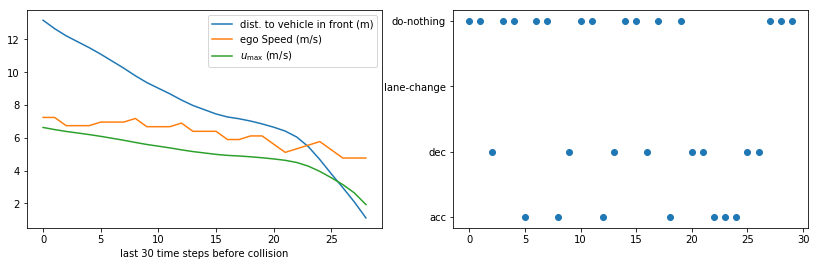

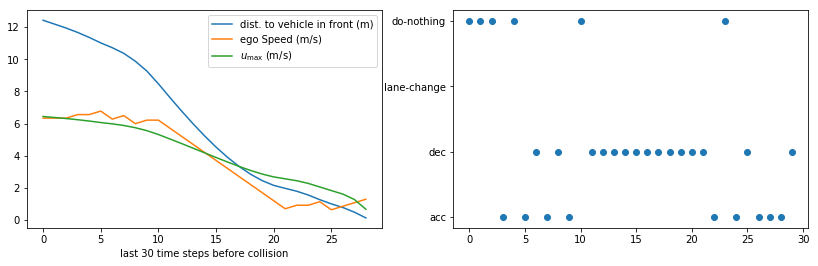

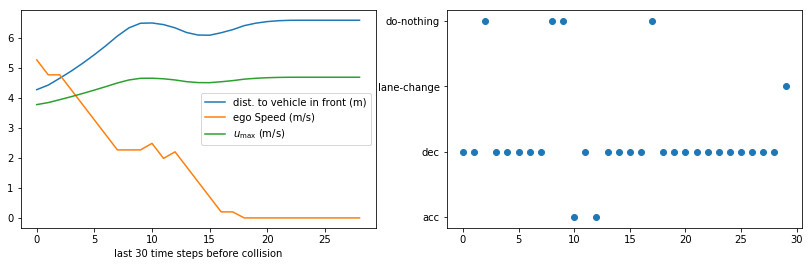

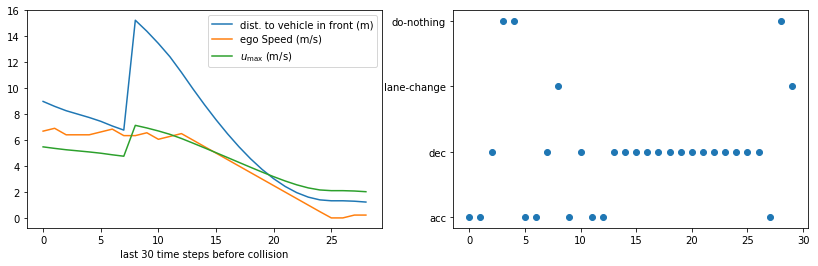

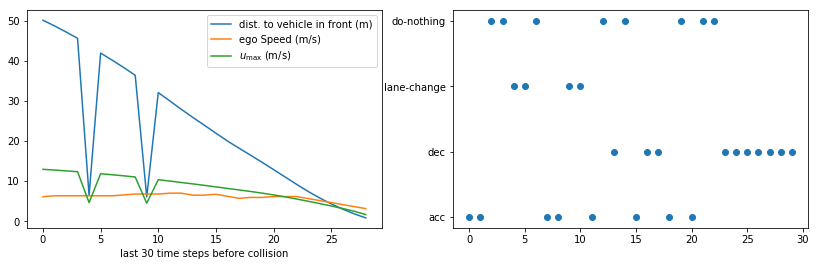

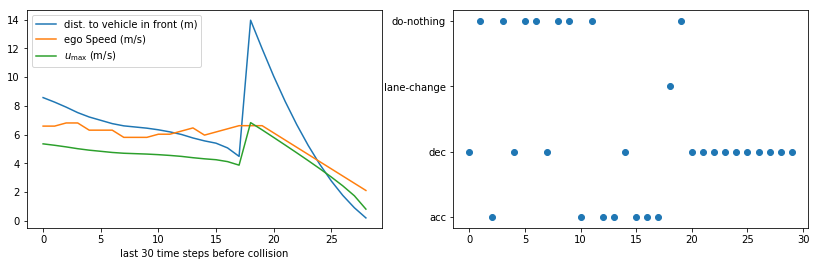

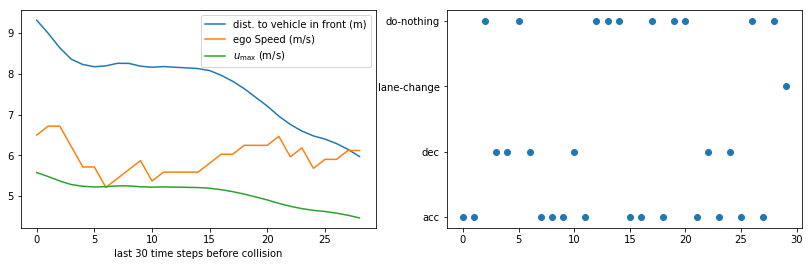

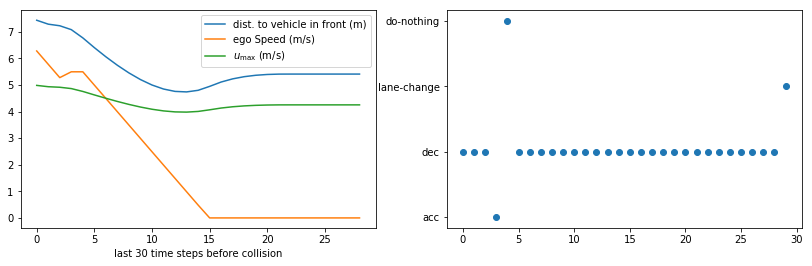

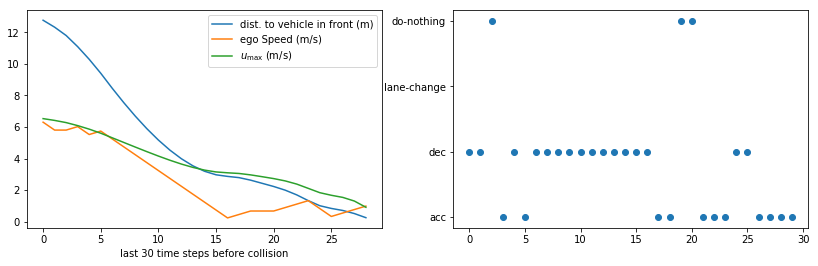

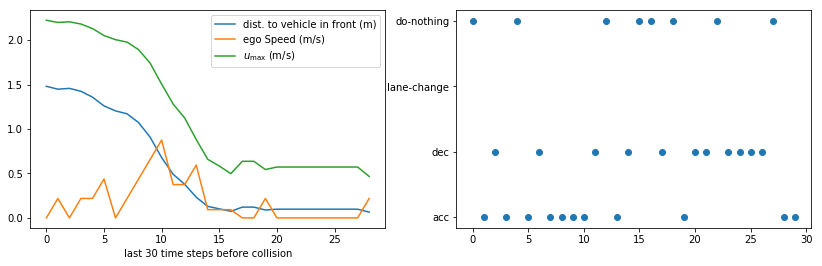

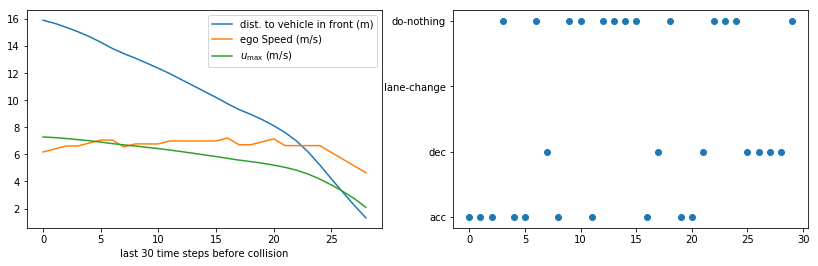

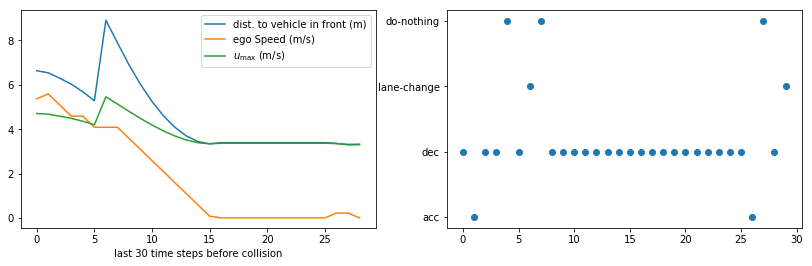

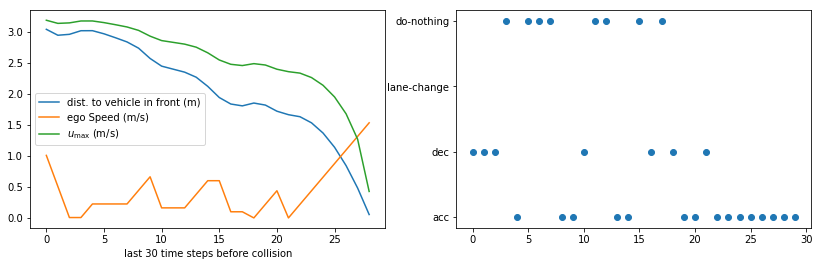

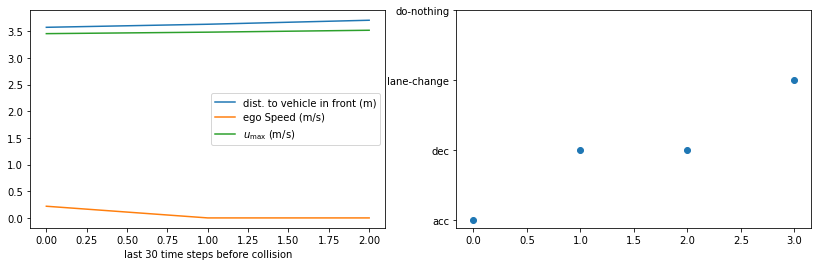

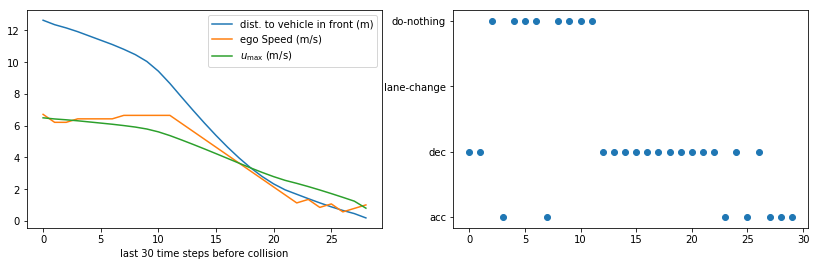

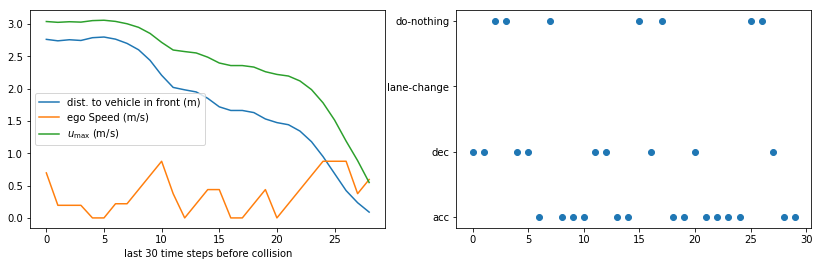

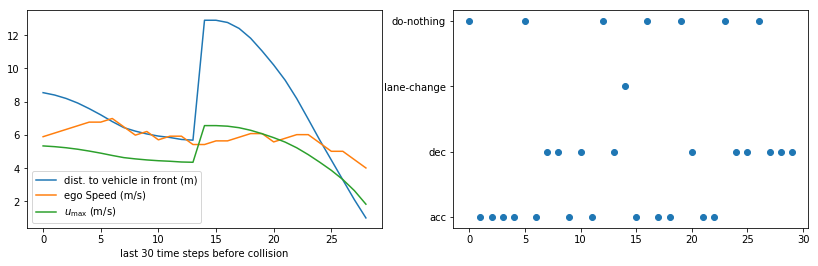

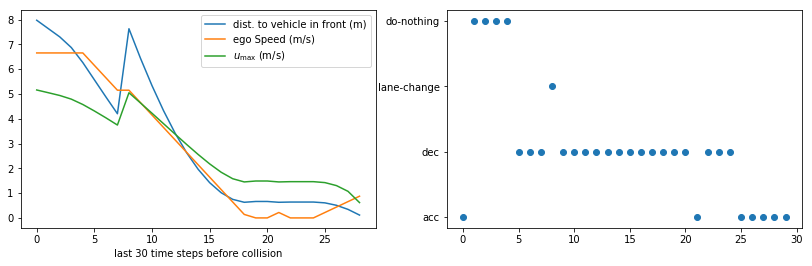

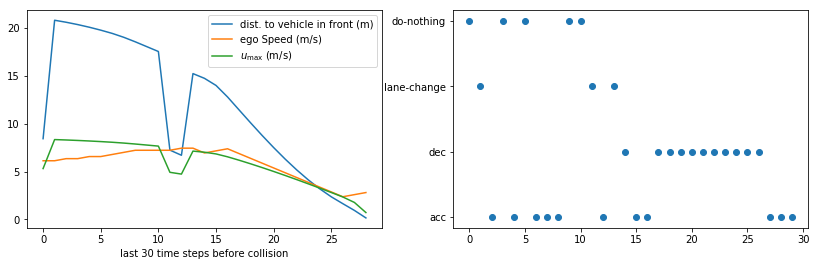

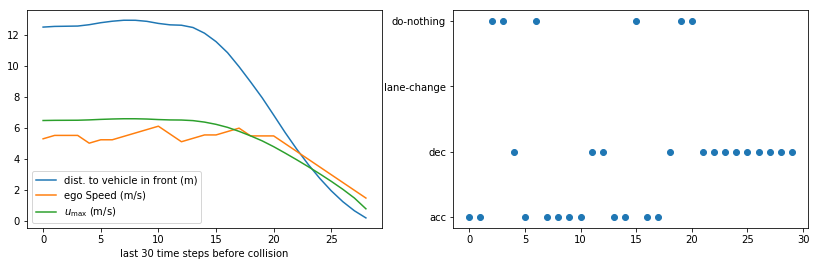

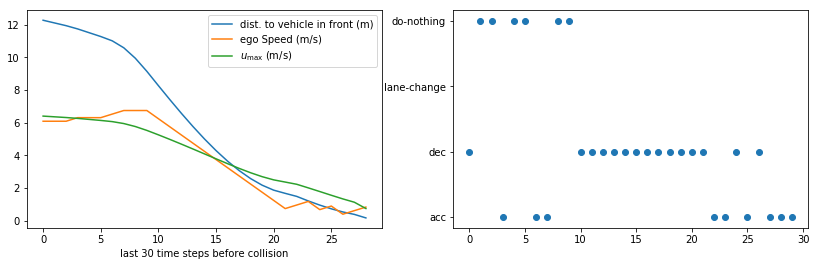

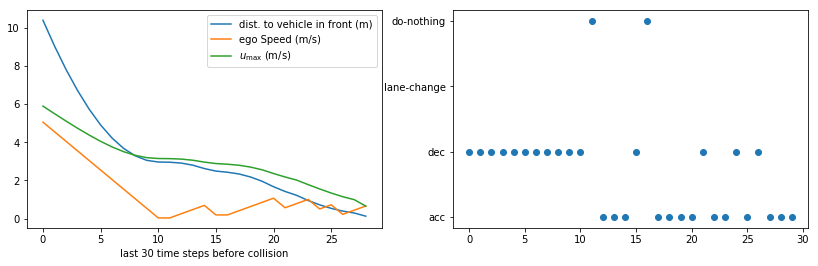

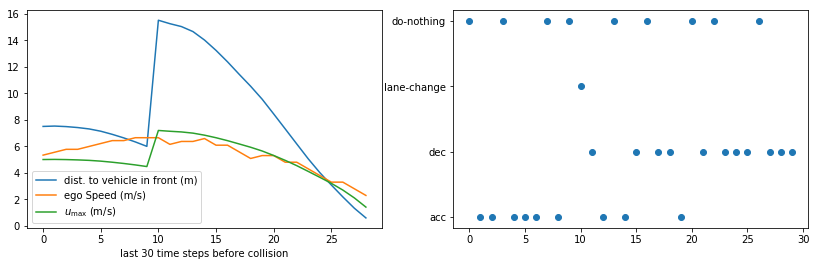

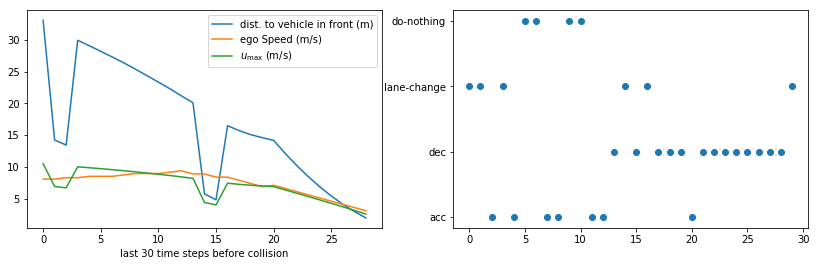

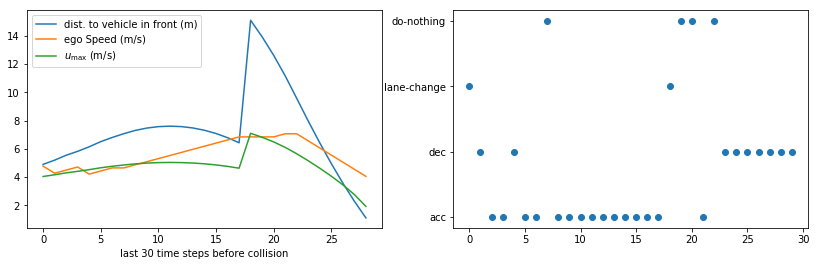

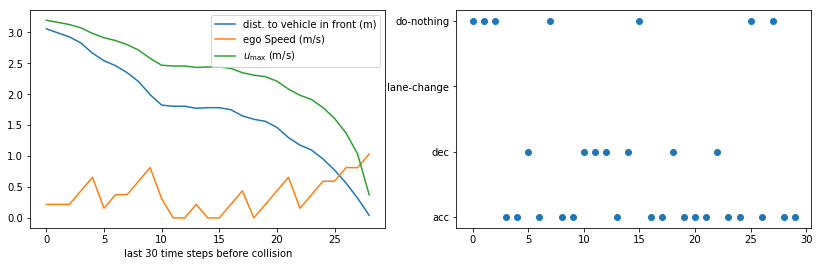

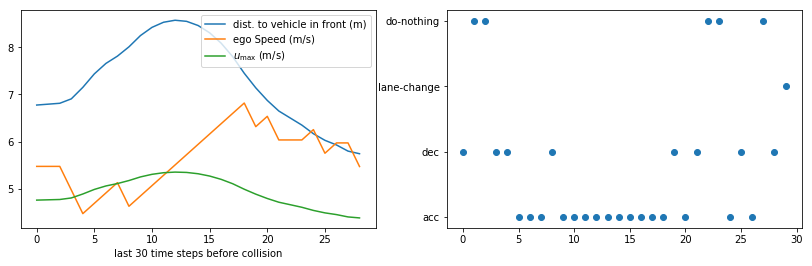

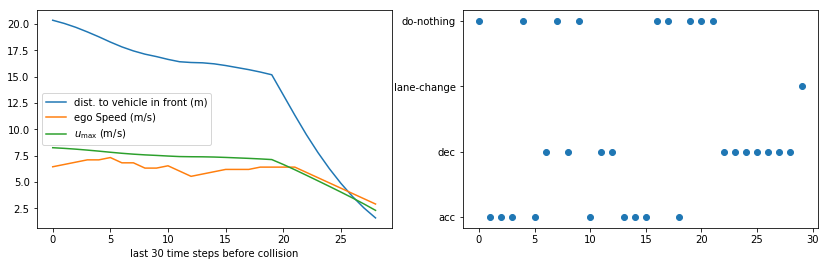

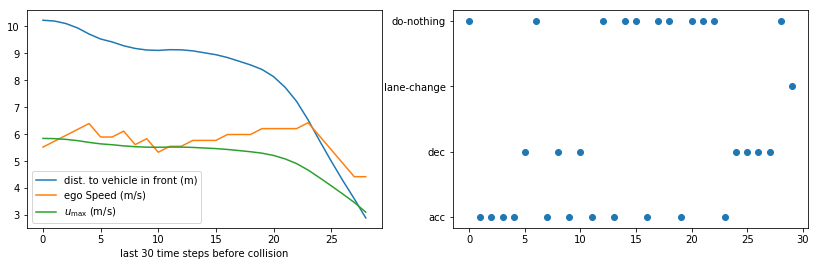

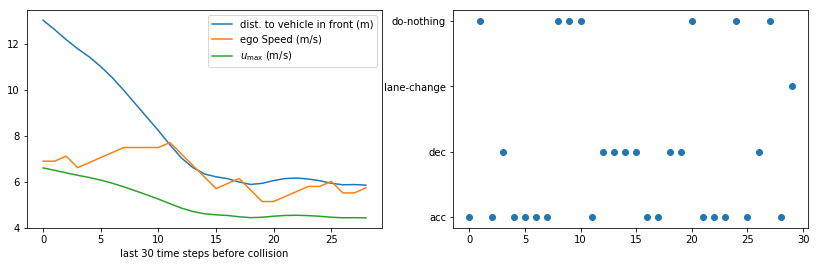

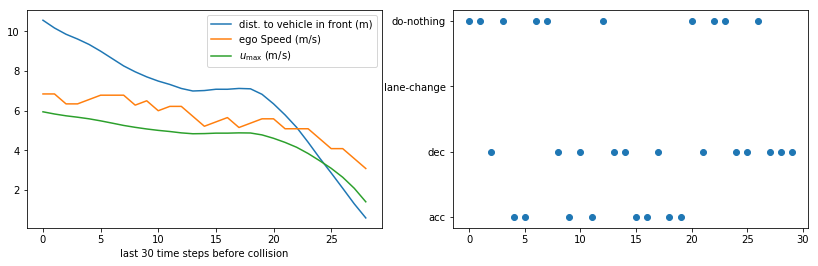

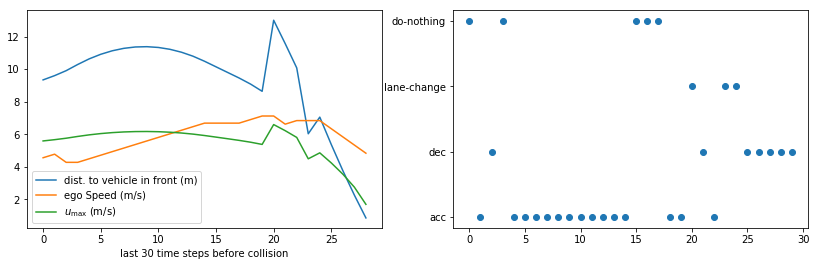

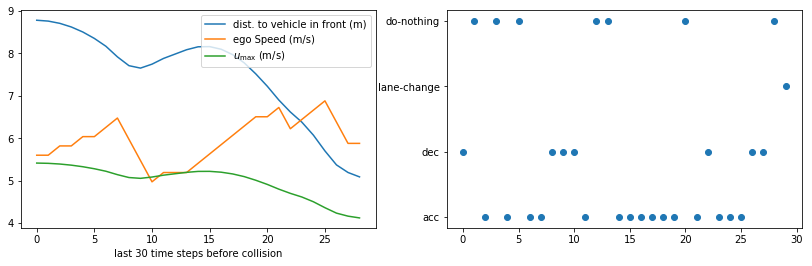

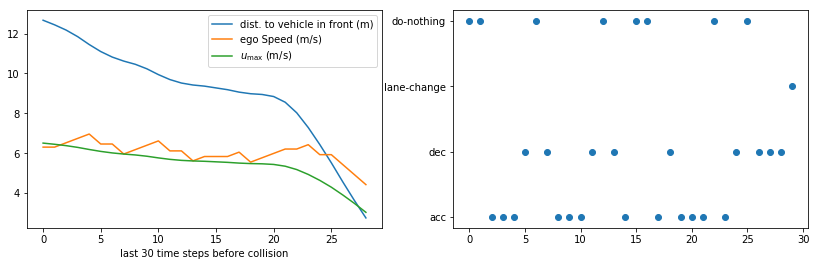

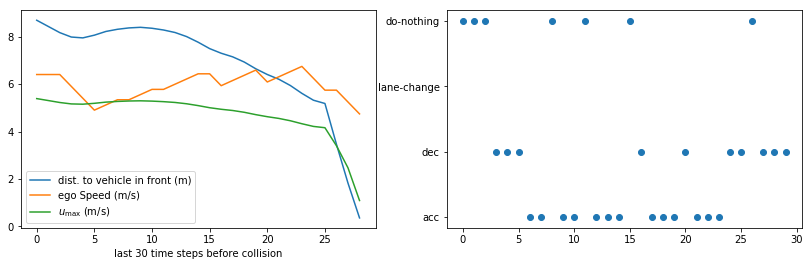

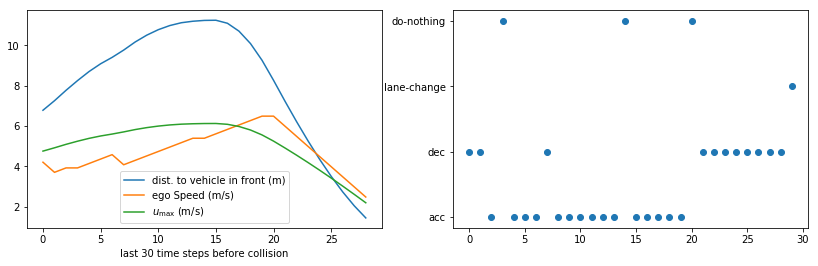

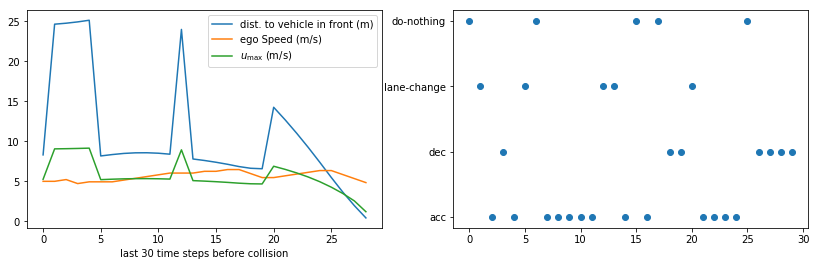

In [18]:
numLastSteps = 30
egoSpeedofprematureEpisodes = []
bum2bumdistofprematureEpisodes = []
actionsOfPrematureEpisodes = []

for episode in prematureEpisodeNumbers:
    egoSpeedofprematureEpisodes.append(simData['data'][density][episode]['speed'][-numLastSteps:])
    bum2bumdistofprematureEpisodes.append(simData['data'][density][episode]['bum2bumdist'][-numLastSteps:])
    actionsOfPrematureEpisodes.append(simData['data'][density][episode]['actions'][-numLastSteps:])

for idx in range(0, len(egoSpeedofprematureEpisodes)):
    bum2bumdistofprematureEpisodes[idx].pop()
    egoSpeedofprematureEpisodes[idx].pop()
    fig, axs = plt.subplots(1, 2, figsize=(14,4))
    
    axs[0].plot(np.arange(len(bum2bumdistofprematureEpisodes[idx])), bum2bumdistofprematureEpisodes[idx], label="dist. to vehicle in front (m)")
    axs[0].plot(np.arange(len(egoSpeedofprematureEpisodes[idx])), egoSpeedofprematureEpisodes[idx], label="ego Speed (m/s)")
    
    vehicleUmax = umax(bum2bumdistofprematureEpisodes[idx], 1.67)
    vehicleActions = decodeActions(actionsOfPrematureEpisodes[idx])
    axs[0].plot(np.arange(len(egoSpeedofprematureEpisodes[idx])), vehicleUmax, label="$u_{\max}$ (m/s)")
    
    axs[0].set_xlabel("last %d time steps before collision"%(numLastSteps))
    axs[0].legend()
    
    axs[1].scatter(np.arange(len(vehicleActions)), vehicleActions)
    
    axs[1].set_yticks(np.arange(4))
    axs[1].set_yticklabels(['acc', 'dec', 'lane-change', 'do-nothing'])
    plt.show()